## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [ ]:
df = df.sample(50000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 507235 to 1460142
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50000 non-null  int64 
 1   id      50000 non-null  int64 
 2   date    50000 non-null  object
 3   flag    50000 non-null  object
 4   user    50000 non-null  object
 5   text    50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
# Remover valores nulos

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 507235 to 1460142
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50000 non-null  int64 
 1   id      50000 non-null  int64 
 2   date    50000 non-null  object
 3   flag    50000 non-null  object
 4   user    50000 non-null  object
 5   text    50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
# Función para limpiar el texto de cada tuit
def preprocess_text(text):

    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remover números
    text = re.sub(r'\d+', '', text)

    # Quitar signos de puntuación
    text = re.sub(r'[^\w\s]', '', text)

    # Convertir a minúsculas
    text = text.lower()
    text=re.sub(r'á', 'a',text) #remover acentos
    text=re.sub(r'é', 'e',text)
    text=re.sub(r'í', 'i',text)
    text=re.sub(r'ó', 'o',text)
    text=re.sub(r'ú', 'u',text)
    return text

In [ ]:
# Aplicar el preprocesamiento a la columna 'text'

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Descargar las palabras de parada (stop words)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para eliminar palabras de parada
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Aplicar el filtrado de palabras de parada a la columna 'cleaned_text'
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,target,id,date,flag,user,text,cleaned_text
507235,0,2188849736,Mon Jun 15 22:41:35 PDT 2009,NO_QUERY,mariekristel,colds and cough + rain,colds cough rain
419203,0,2061933244,Sat Jun 06 21:56:48 PDT 2009,NO_QUERY,princess7elise,Tired....didn't really get to bed last night,tireddidnt really get bed last night
1531494,4,2178034321,Mon Jun 15 07:05:44 PDT 2009,NO_QUERY,iamkrissy,@claygirlcan Sounds great. Are you starting wo...,claygirlcan sounds great starting work immedia...
349200,0,2017065281,Wed Jun 03 07:48:17 PDT 2009,NO_QUERY,coryschop,It will be nice when I am settled soon. I've b...,nice settled soon ive falling behind things
1395886,4,2053772254,Sat Jun 06 05:39:15 PDT 2009,NO_QUERY,BeckaAlicexx,written my first geeky song &quot;Gravity&quot...,written first geeky song quotgravityquot bit s...


In [ ]:
# Eliminar columnas innecesarias
df.drop(['id', 'date', 'flag', 'user', 'text'], axis=1, inplace=True)

In [ ]:
df.head()

,target,cleaned_text
507235,0,colds cough rain
419203,0,tireddidnt really get bed last night
1531494,4,claygirlcan sounds great starting work immedia...
349200,0,nice settled soon ive falling behind things
1395886,4,written first geeky song quotgravityquot bit s...


In [ ]:
df.target.value_counts()

4    25136
0    24864
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Dividir el dataset en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['target'], test_size=0.2, random_state=42)

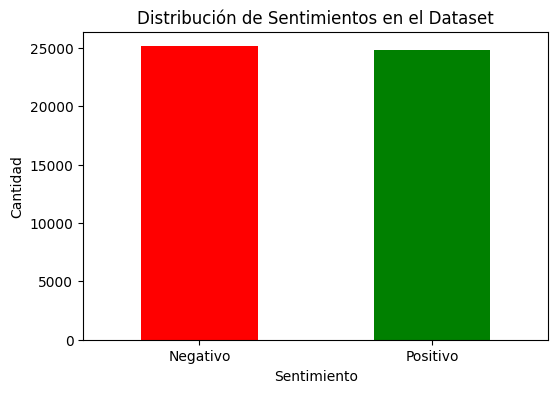

In [ ]:
# Visualizar la distribución de los targets
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks(ticks=[0, 1], labels=['Negativo', 'Positivo'], rotation=0)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.title('Distribución de Sentimientos en el Dataset')
plt.show()

In [ ]:
# Generar nube de palabras para cada clase (positiva/negativa)

def generate_wordcloud(target_value):
    text = ' '.join(df[df['target'] == target_value]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    sentiment = 'Positiva' if target_value == 4 else 'Negativa'
    plt.title(f'Nube de Palabras - Sentimiento {sentiment}')
    plt.show()

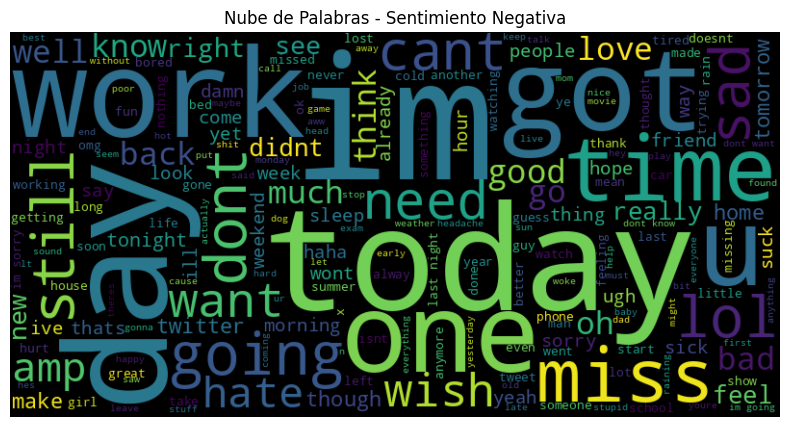

In [ ]:
generate_wordcloud(0)  # Nube de palabras para sentimientos negativos (target=0)

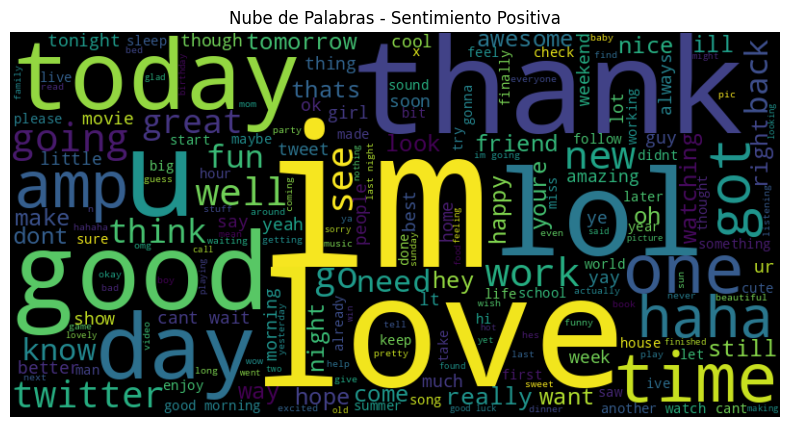

In [ ]:
generate_wordcloud(4)  # Nube de palabras para sentimientos positivos (target=4)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF, para destacar las palabras que son más importantes en comparación con otras

vectorizer = TfidfVectorizer(max_features=5000)  # Limitamos a 5000 características para evitar alta dimensionalidad

# Entrenar el vectorizador en el conjunto de entrenamiento y transformar los datos

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vectorized, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test_vectorized)

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de Confusión:')
print(conf_matrix)

Precisión del modelo: 0.75
Matriz de Confusión:
[[3607 1352]
 [1130 3911]]


<Axes: >

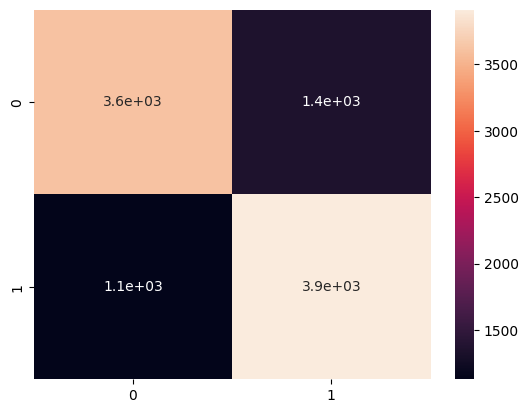

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# Realizar una prueba con un texto personal
text_to_test = 'Chester is the best dog in the world'
text_to_test_cleaned = remove_stopwords(preprocess_text(text_to_test))
text_vectorized = vectorizer.transform([text_to_test_cleaned])
prediction = svm_model.predict(text_vectorized)
sentiment = 'positivo' if prediction[0] == 4 else 'negativo'
print(f'\nEl sentimiento del texto "{text_to_test}" es: {sentiment}')


El sentimiento del texto "Chester is the best dog in the world" es: positivo


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Entrenar un segundo modelo con Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Predicciones del segundo modelo
y_pred_nb = nb_model.predict(X_test_vectorized)

# Matriz de confusión del segundo modelo
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print('Matriz de Confusión - Segundo Modelo:')
print(conf_matrix_nb)

# Precisión del segundo modelo
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Precisión del segundo modelo:', accuracy_nb)

# Prueba con un texto personalizado en el segundo modelo
sentiment_predit_nb = nb_model.predict(text_vectorized)[0]

print(f"Texto: {text_to_test}")
print(f"Sentimiento predicho (Segundo modelo): {'Positivo' if sentiment_predit_nb == 4 else 'Negativo'}")

Matriz de Confusión - Segundo Modelo:
[[3682 1277]
 [1323 3718]]
Precisión del segundo modelo: 0.74
Texto: Chester is the best dog in the world
Sentimiento predicho (Segundo modelo): Positivo


## Conclusiones

De los 1.6 millones de datos unicamente se ocupo 50000, lo que representa el
3.125% del conjunto de datos, si bien el modelo Naive Bayes se utiliza para grandes conjuntos de datos, no requiere de muchos ajustes de hiperparametros obtuvo una precisón de 0.7476, siendo menor a la precisión al modelo SVM de 0.76.

El modelo SVM es más eficiente en espacios de alta demiensionalidad, lo que hace adecuado para procesar datos de texto con gran cantitdad de pablabras clave, adicional a esto, SVM es menos sensible a datos de entrenamiento insuficientes o poco representativos, mientras que Naive Bayes, puede verse afectado mas negativamente.

En general, ambos son buenos algoritmos para clasificación en problemas de procesamiento de lenguaje natural, la elección dependerá mucho del tamaño, la naturaleza del conjunto, el tiempo de entrenamiento y la precisión deseada.
